# Lab | Data cleaning and wrangling

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

#### Instructions

So far we have worked on EDA. This lab will focus on data cleaning and wrangling from everything we noticed before.

1) We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

2) Create a copy of the dataframe for the data wrangling.

3) Normalize the continuous variables. You can use any one method you want.

4) Encode the categorical variables. You should deal with the categorical variables as shown below:
- One hot to state
- Ordinal to coverage
- Ordinal to employmentstatus
- Ordinal to location code
- One hot to marital status
- One hot to policy type
- One hot to policy
- One hot to renew offercustomer_df
- One hot to sales channel
- One hot vehicle class
- Ordinal vehicle size

5) The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

6) Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import re

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
df.head(10)

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   
5  OC83172      Oregon              8256.297800      Yes     Basic  Bachelor   
6  XZ87318      Oregon              5380.898636      Yes     Basic   College   
7  CF85061     Arizona              7216.100311       No   Premium    Master   
8  DY87989      Oregon             24127.504020      Yes     Basic  Bachelor   
9  BQ94931      Oregon              7388.178085       No  Extended   College   

  Effective To Date EmploymentStatus Gender  Income Location Code  \
0           2/24/11         Employed      F   56274      Suburban   
1           1/31/11       Unemployed      F       0      Suburban   
2           2/19/11         Employed      F   48767      Suburban   
3           1/20/11       Unemployed      M       0      Suburban   
4            2/3/11         Employed      M   43836         Rural   
5           1/25/11         Employed      F   62902         Rural   
6           2/24/11         Employed      F   55350      Suburban   
7           1/18/11       Unemployed      M       0         Urban   
8           1/26/11    Medical Leave      M   14072      Suburban   
9           2/17/11         Employed      F   28812         Urban   

  Marital Status  Monthly Premium Auto  Months Since Last Claim  \
0        Married                    69                       32   
1         Single                    94                       13   
2        Married                   108                       18   
3        Married                   106                       18   
4         Single                    73                       12   
5        Married                    69                       14   
6        Married                    67                        0   
7         Single                   101                        0   
8       Divorced                    71                       13   
9        Married                    93                       17   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   
5                             94                          0   
6                             13                          0   
7                             68                          0   
8                              3                          0   
9                              7                          0   

   Number of Policies     Policy Type        Policy Renew Offer Type  \
0                   1  Corporate Auto  Corporate L3           Offer1   
1                   8   Personal Auto   Personal L3           Offer3   
2                   2   Personal Auto   Personal L3           Offer1   
3                   7  Corporate Auto  Corporate L2           Offer1   
4                   1   Personal Auto   Personal L1           Offer1   
5                   2   Personal Auto   Personal L3           Offer2   
6                   9  Corporate Auto  Corporate L3           Offer1   
7                   4  Corporate Auto  Corporate L3           Offer1   
8                   2  Corporate Auto  Corporate L3           Offer1   
9                   8    Special Auto    Special L2           Offer2   

  Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  
0         Agent          384.811147   Two-Door Car      Medsize  
1   

In [4]:
df.shape

(9134, 24)

# Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
df.columns = [df.columns[col_name].lower().replace(' ','_') for col_name in range(len(df.columns))]
df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [7]:
df.set_index('customer', inplace=True)
df.head(10)

state  customer_lifetime_value response  coverage education  \
customer                                                                     
BU79786   Washington              2763.519279       No     Basic  Bachelor   
QZ44356      Arizona              6979.535903       No  Extended  Bachelor   
AI49188       Nevada             12887.431650       No   Premium  Bachelor   
WW63253   California              7645.861827       No     Basic  Bachelor   
HB64268   Washington              2813.692575       No     Basic  Bachelor   
OC83172       Oregon              8256.297800      Yes     Basic  Bachelor   
XZ87318       Oregon              5380.898636      Yes     Basic   College   
CF85061      Arizona              7216.100311       No   Premium    Master   
DY87989       Oregon             24127.504020      Yes     Basic  Bachelor   
BQ94931       Oregon              7388.178085       No  Extended   College   

         effective_to_date employmentstatus gender  income location_code  \
customer                                                                   
BU79786            2/24/11         Employed      F   56274      Suburban   
QZ44356            1/31/11       Unemployed      F       0      Suburban   
AI49188            2/19/11         Employed      F   48767      Suburban   
WW63253            1/20/11       Unemployed      M       0      Suburban   
HB64268             2/3/11         Employed      M   43836         Rural   
OC83172            1/25/11         Employed      F   62902         Rural   
XZ87318            2/24/11         Employed      F   55350      Suburban   
CF85061            1/18/11       Unemployed      M       0         Urban   
DY87989            1/26/11    Medical Leave      M   14072      Suburban   
BQ94931            2/17/11         Employed      F   28812         Urban   

         marital_status  monthly_premium_auto  months_since_last_claim  \
customer                                                                 
BU79786         Married                    69                       32   
QZ44356          Single                    94                       13   
AI49188         Married                   108                       18   
WW63253         Married                   106                       18   
HB64268          Single                    73                       12   
OC83172         Married                    69                       14   
XZ87318         Married                    67                        0   
CF85061          Single                   101                        0   
DY87989        Divorced                    71                       13   
BQ94931         Married                    93                       17   

          months_since_policy_inception  number_of_open_complaints  \
customer                                                             
BU79786                               5                          0   
QZ44356                              42                          0   
AI49188                              38                          0   
WW63253                              65                          0   
HB64268                              44                          0   
OC83172                              94                          0   
XZ87318                              13                          0   
CF85061                              68                          0   
DY87989                               3                          0   
BQ94931                               7                          0   

          number_of_policies     policy_type        policy renew_offer_type  \
customer                                                                      
BU79786                    1  Corporate Auto  Corporate L3           Offer1   
QZ44356                    8   Personal Auto   Personal L3           Offer3   
AI49188                    2   Personal Auto   Personal L3           Offer1   
WW63253                    7  Corporate 

In [8]:
df.isna().sum()

state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [9]:
# Column 'effective_to_date' is not in the right format:

df['effective_to_date'] = pd.to_datetime(df['effective_to_date'], errors='coerce')


# Column 'policy' contains crossed data from 'policy_type'. Erase it:

for i in range(len(df['policy'])):
    df['policy'][i] = df['policy'][i].split()[1]

In [10]:
# Check the consistency of categorical values

for col in df.select_dtypes(np.object).columns:
    print("Unique entires for", col.upper(), "are:", df[col].unique())

Unique entires for STATE are: ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
Unique entires for RESPONSE are: ['No' 'Yes']
Unique entires for COVERAGE are: ['Basic' 'Extended' 'Premium']
Unique entires for EDUCATION are: ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
Unique entires for EMPLOYMENTSTATUS are: ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
Unique entires for GENDER are: ['F' 'M']
Unique entires for LOCATION_CODE are: ['Suburban' 'Rural' 'Urban']
Unique entires for MARITAL_STATUS are: ['Married' 'Single' 'Divorced']
Unique entires for POLICY_TYPE are: ['Corporate Auto' 'Personal Auto' 'Special Auto']
Unique entires for POLICY are: ['L3' 'L2' 'L1']
Unique entires for RENEW_OFFER_TYPE are: ['Offer1' 'Offer3' 'Offer2' 'Offer4']
Unique entires for SALES_CHANNEL are: ['Agent' 'Call Center' 'Web' 'Branch']
Unique entires for VEHICLE_CLASS are: ['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
Unique entires f

# EDA

## Numerical variables

In [11]:
df.describe().round(2)

customer_lifetime_value    income  monthly_premium_auto  \
count                  9134.00   9134.00               9134.00   
mean                   8004.94  37657.38                 93.22   
std                    6870.97  30379.90                 34.41   
min                    1898.01      0.00                 61.00   
25%                    3994.25      0.00                 68.00   
50%                    5780.18  33889.50                 83.00   
75%                    8962.17  62320.00                109.00   
max                   83325.38  99981.00                298.00   

       months_since_last_claim  months_since_policy_inception  \
count                  9134.00                        9134.00   
mean                     15.10                          48.06   
std                      10.07                          27.91   
min                       0.00                           0.00   
25%                       6.00                          24.00   
50%                      14.00                          48.00   
75%                      23.00                          71.00   
max                      35.00                          99.00   

       number_of_open_complaints  number_of_policies  total_claim_amount  
count                    9134.00             9134.00             9134.00  
mean                        0.38                2.97              434.09  
std                         0.91                2.39              290.50  
min                         0.00                1.00                0.10  
25%                         0.00                1.00              272.26  
50%                         0.00                2.00              383.95  
75%                         0.00                4.00              547.51  
max                         5.00                9.00             2893.24

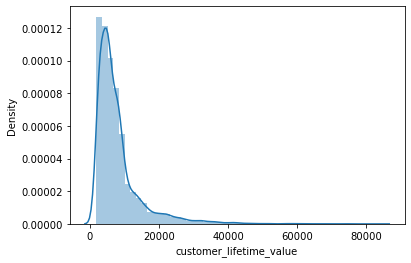

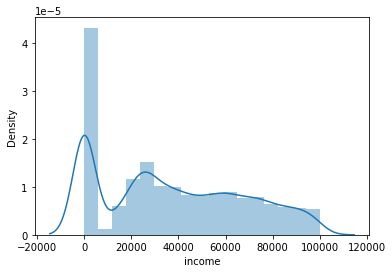

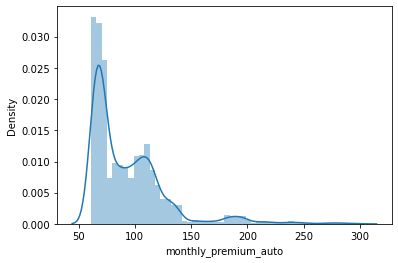

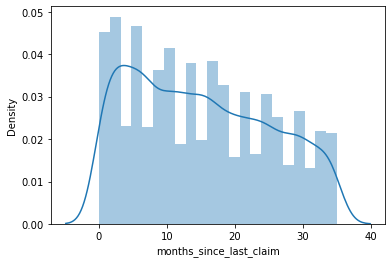

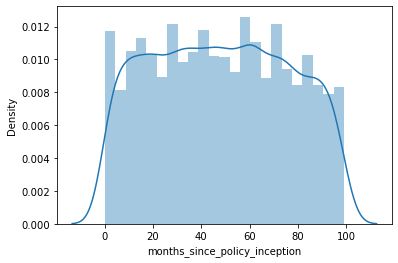

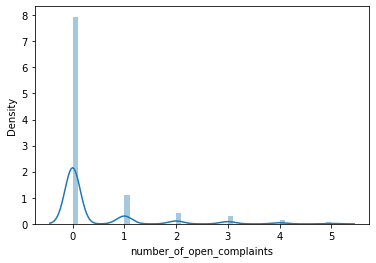

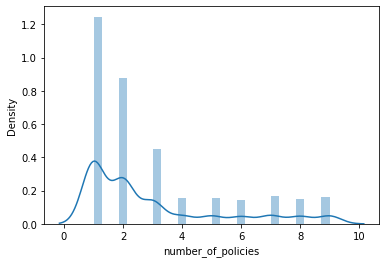

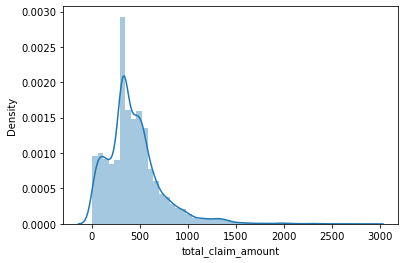

In [12]:
for column in df.select_dtypes(np.number).columns:
    sns.distplot(df[column])
    plt.show()

## Categorical data

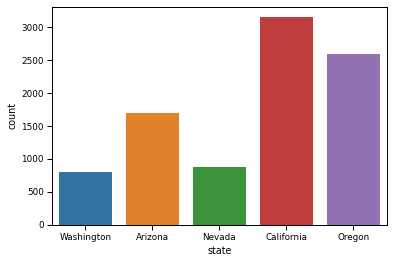

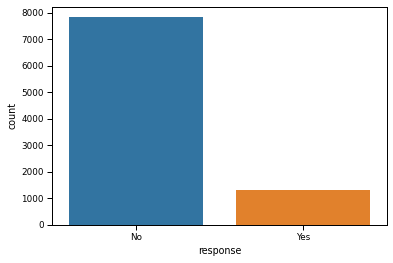

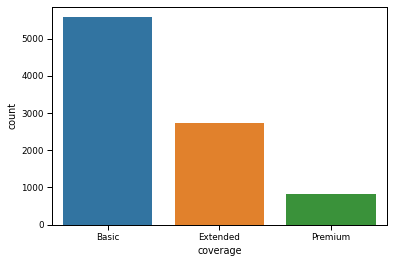

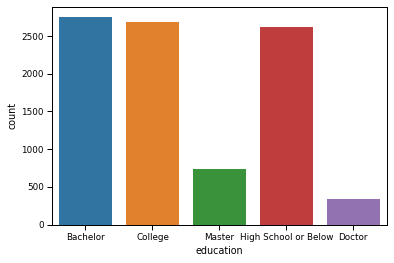

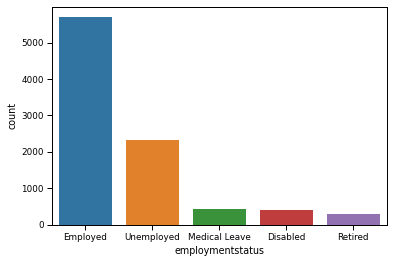

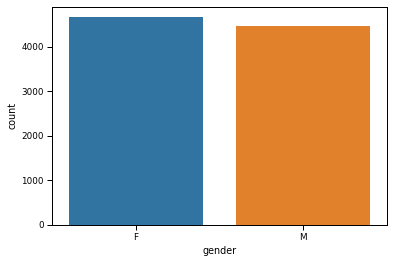

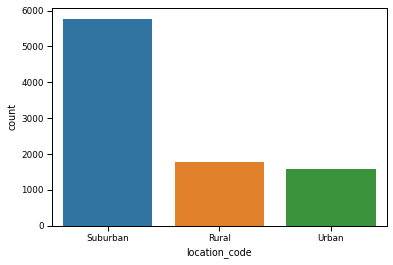

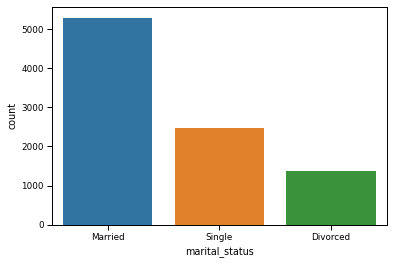

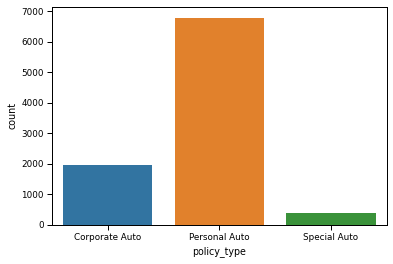

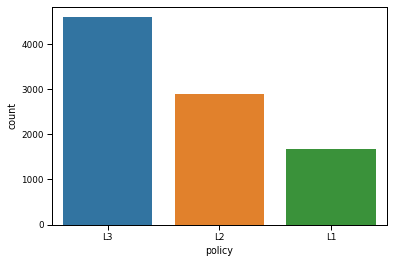

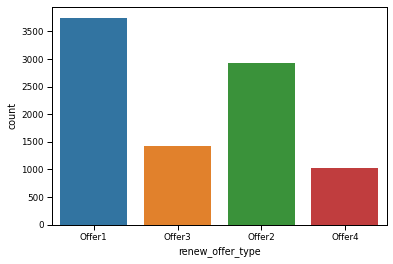

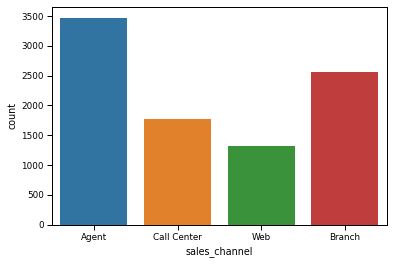

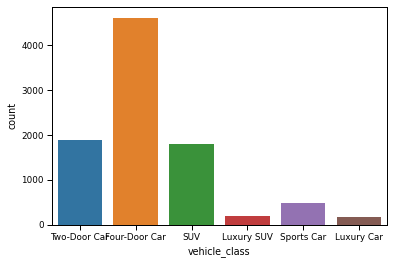

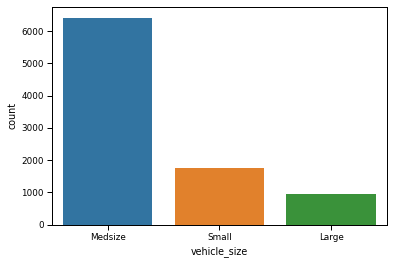

In [34]:
for col in df.select_dtypes(np.object).columns:
    sns.countplot(x=df[col]) #, hue=df['education']
    plt.show()

In [14]:
corr_mat = df.corr(method='spearman')
corr_mat

customer_lifetime_value    income  \
customer_lifetime_value                       1.000000  0.055395   
income                                        0.055395  1.000000   
monthly_premium_auto                          0.453933 -0.017608   
months_since_last_claim                       0.005126 -0.025784   
months_since_policy_inception                -0.002429 -0.001945   
number_of_open_complaints                    -0.031312  0.006334   
number_of_policies                            0.488860 -0.010273   
total_claim_amount                            0.210598 -0.401598   

                               monthly_premium_auto  months_since_last_claim  \
customer_lifetime_value                    0.453933                 0.005126   
income                                    -0.017608                -0.025784   
monthly_premium_auto                       1.000000                -0.005989   
months_since_last_claim                   -0.005989                 1.000000   
months_since_policy_inception              0.014596                -0.048269   
number_of_open_complaints                 -0.012751                 0.005736   
number_of_policies                        -0.006936                 0.011439   
total_claim_amount                         0.522261                -0.000782   

                               months_since_policy_inception  \
customer_lifetime_value                            -0.002429   
income                                             -0.001945   
monthly_premium_auto                                0.014596   
months_since_last_claim                            -0.048269   
months_since_policy_inception                       1.000000   
number_of_open_complaints                          -0.013233   
number_of_policies                                 -0.009546   
total_claim_amount                                 -0.006569   

                               number_of_open_complaints  number_of_policies  \
customer_lifetime_value                        -0.031312            0.488860   
income                                          0.006334           -0.010273   
monthly_premium_auto                           -0.012751           -0.006936   
months_since_last_claim                         0.005736            0.011439   
months_since_policy_inception                  -0.013233           -0.009546   
number_of_open_complaints                       1.000000            0.001523   
number_of_policies                              0.001523            1.000000   
total_claim_amount                             -0.024694           -0.011100   

                               total_claim_amount  
customer_lifetime_value                  0.210598  
income                                  -0.401598  
monthly_premium_auto                     0.522261  
months_since_last_claim                 -0.000782  
months_since_policy_inception           -0.006569  
number_of_open_complaints               -0.024694  
number_of_policies                      -0.011100  
total_claim_amount                       1.000000

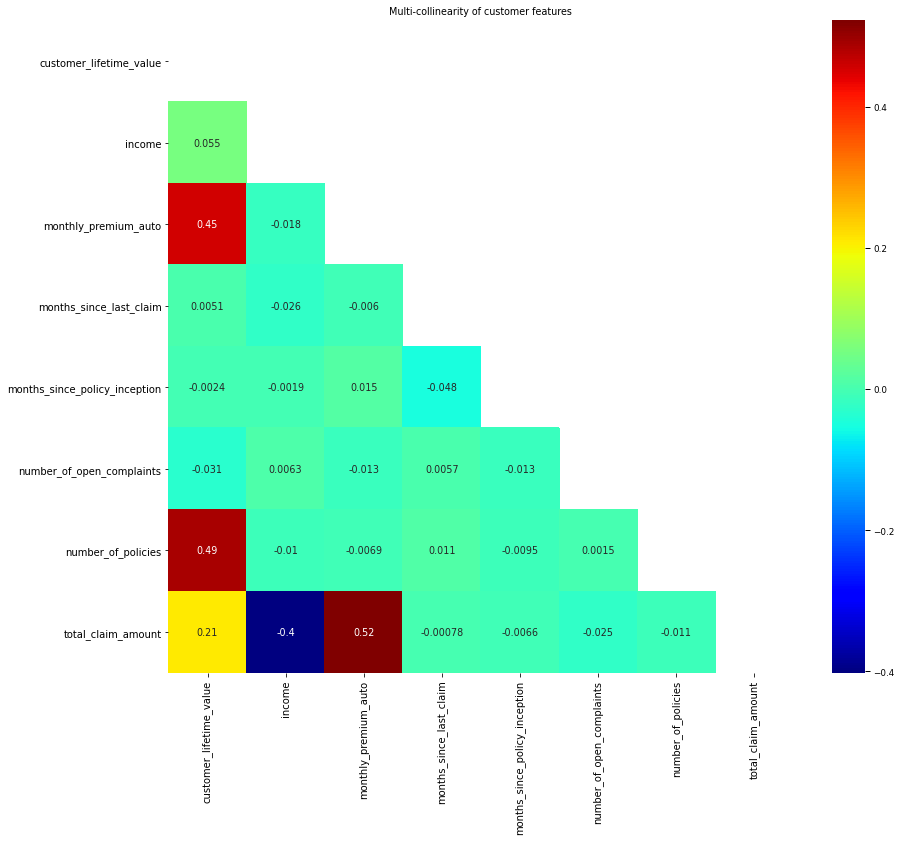

In [15]:
# Plot a correlation matrix to locate possible correlation right away

mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True # Mask to hide the repeated half of the matrix

fig, ax = plt.subplots(figsize=(14, 12)) # this will set the width and height of the plot
sns.set_context('paper') #This affects things like the size of the labels, lines, and other elements of the plot
ax = sns.heatmap(corr_mat, mask=mask, annot=True, cmap='jet') # Heatmap declaration
ax.set_title('Multi-collinearity of customer features') #Title for the graph
plt.show()
# plt.savefig('heatmap.png') 

<AxesSubplot:ylabel='effective_to_date'>

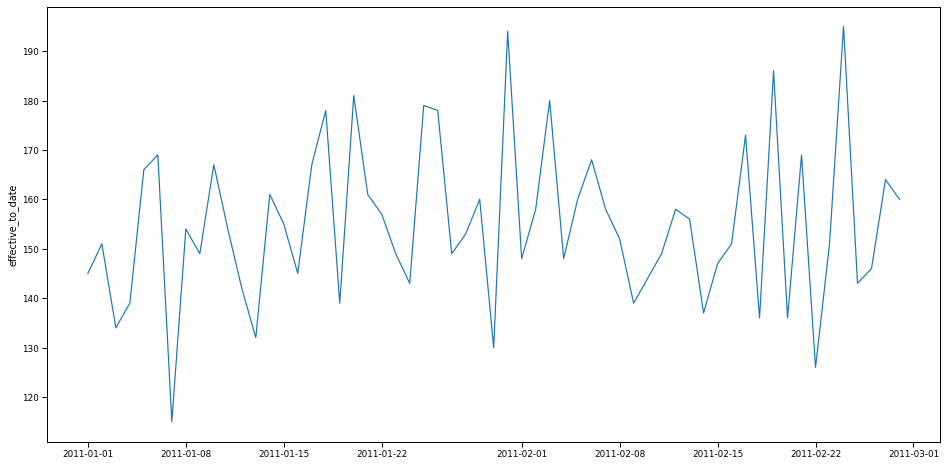

In [16]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.lineplot(x=df['effective_to_date'].unique(), y=df['effective_to_date'].value_counts())

# Data cleaning and wrangling

#### Instructions

1) We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

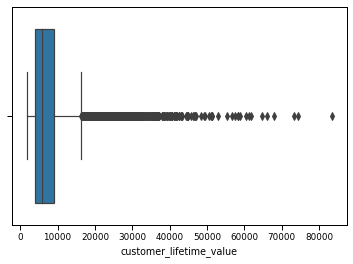

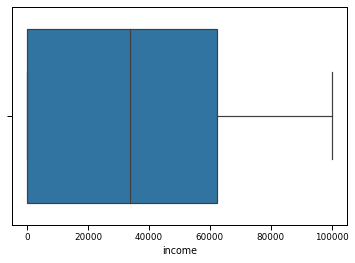

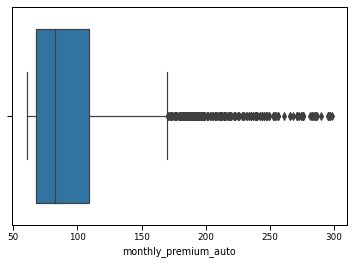

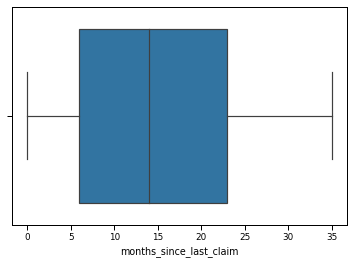

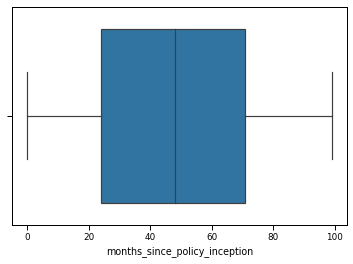

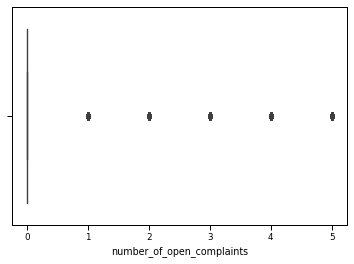

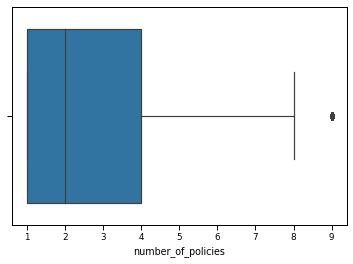

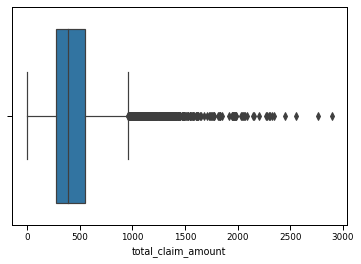

In [17]:
# Show outliers

for column in df.select_dtypes(include='number').columns:
    sns.boxplot(df[column])
    plt.show()

In [30]:
# Remove outliers

def remove_outliers(df, threshold=1.5, in_columns=df.select_dtypes(include='number').columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(df[column],75)
            lower = np.percentile(df[column],25)
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            df = df[(df[column]>=lower_limit) & (df[column]<=upper_limit)]
    return df

#### Instructions

2) Create a copy of the dataframe for the data wrangling.

In [31]:
# Do not reduce your data too much, but play with the parameters, 
# so after a better analysis you can choose which columns to drop outliers from

print(len(df), "original columns")

df1 = df.copy()

df1 = remove_outliers(df1, threshold=2.5)

print(len(df1), "columns after removing outliers")

9134 original columns
5888 columns after removing outliers


In [ ]:
# Filter outliers on the most important columns with a tighter threshold

print(len(df1), "original columns")

df2 = remove_outliers(df1, threshold=1.5, in_columns=['income', 'monthly_premium_auto', 'total_claim_amount'])
# now filter the outliers on the more important columns with a tighter threshold

print(len(df2), "columns after removing outliers")

#### Instructions

3) Normalize the continuous variables. You can use any one method you want.